In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data=pd.read_csv(r"C:\Users\satya\OneDrive\Desktop\DATATRAINED\Files-main\Files-main\Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
#fill null value
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\satya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

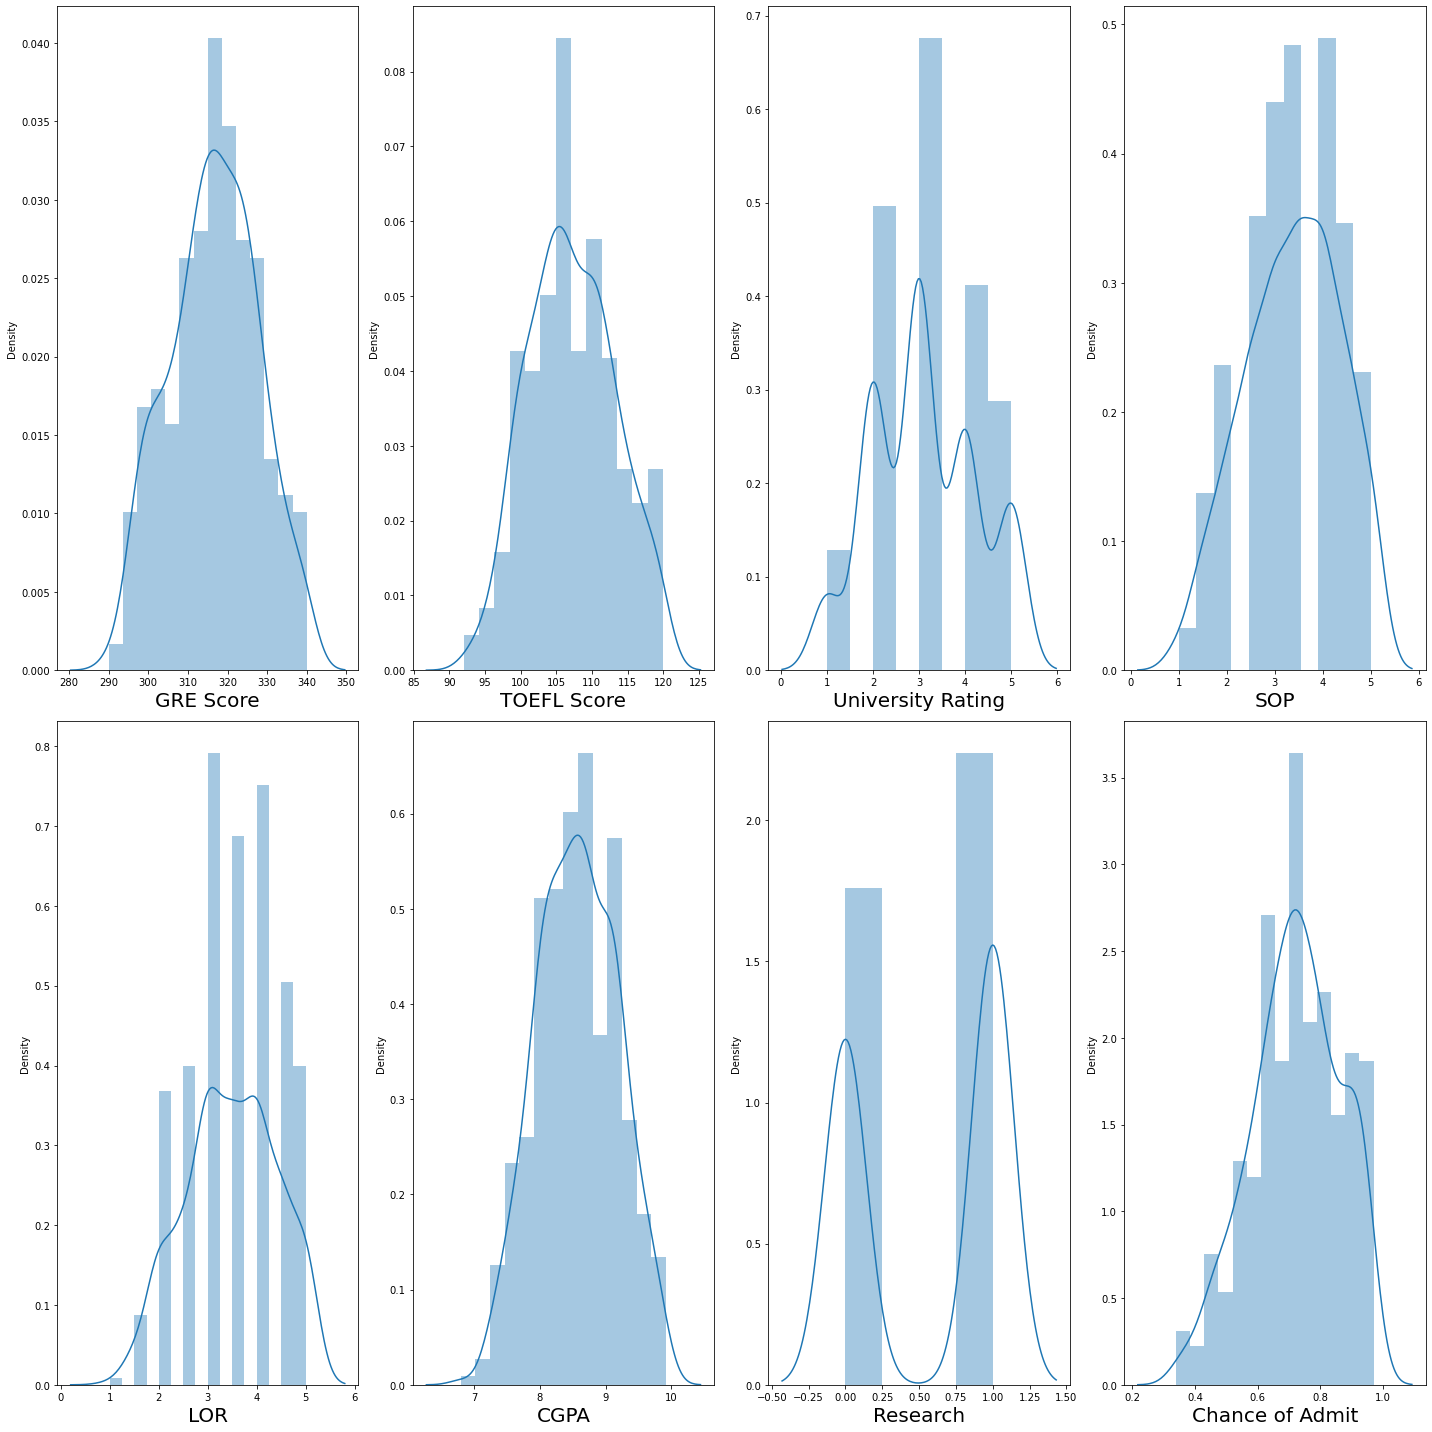

In [8]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [9]:
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

In [10]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

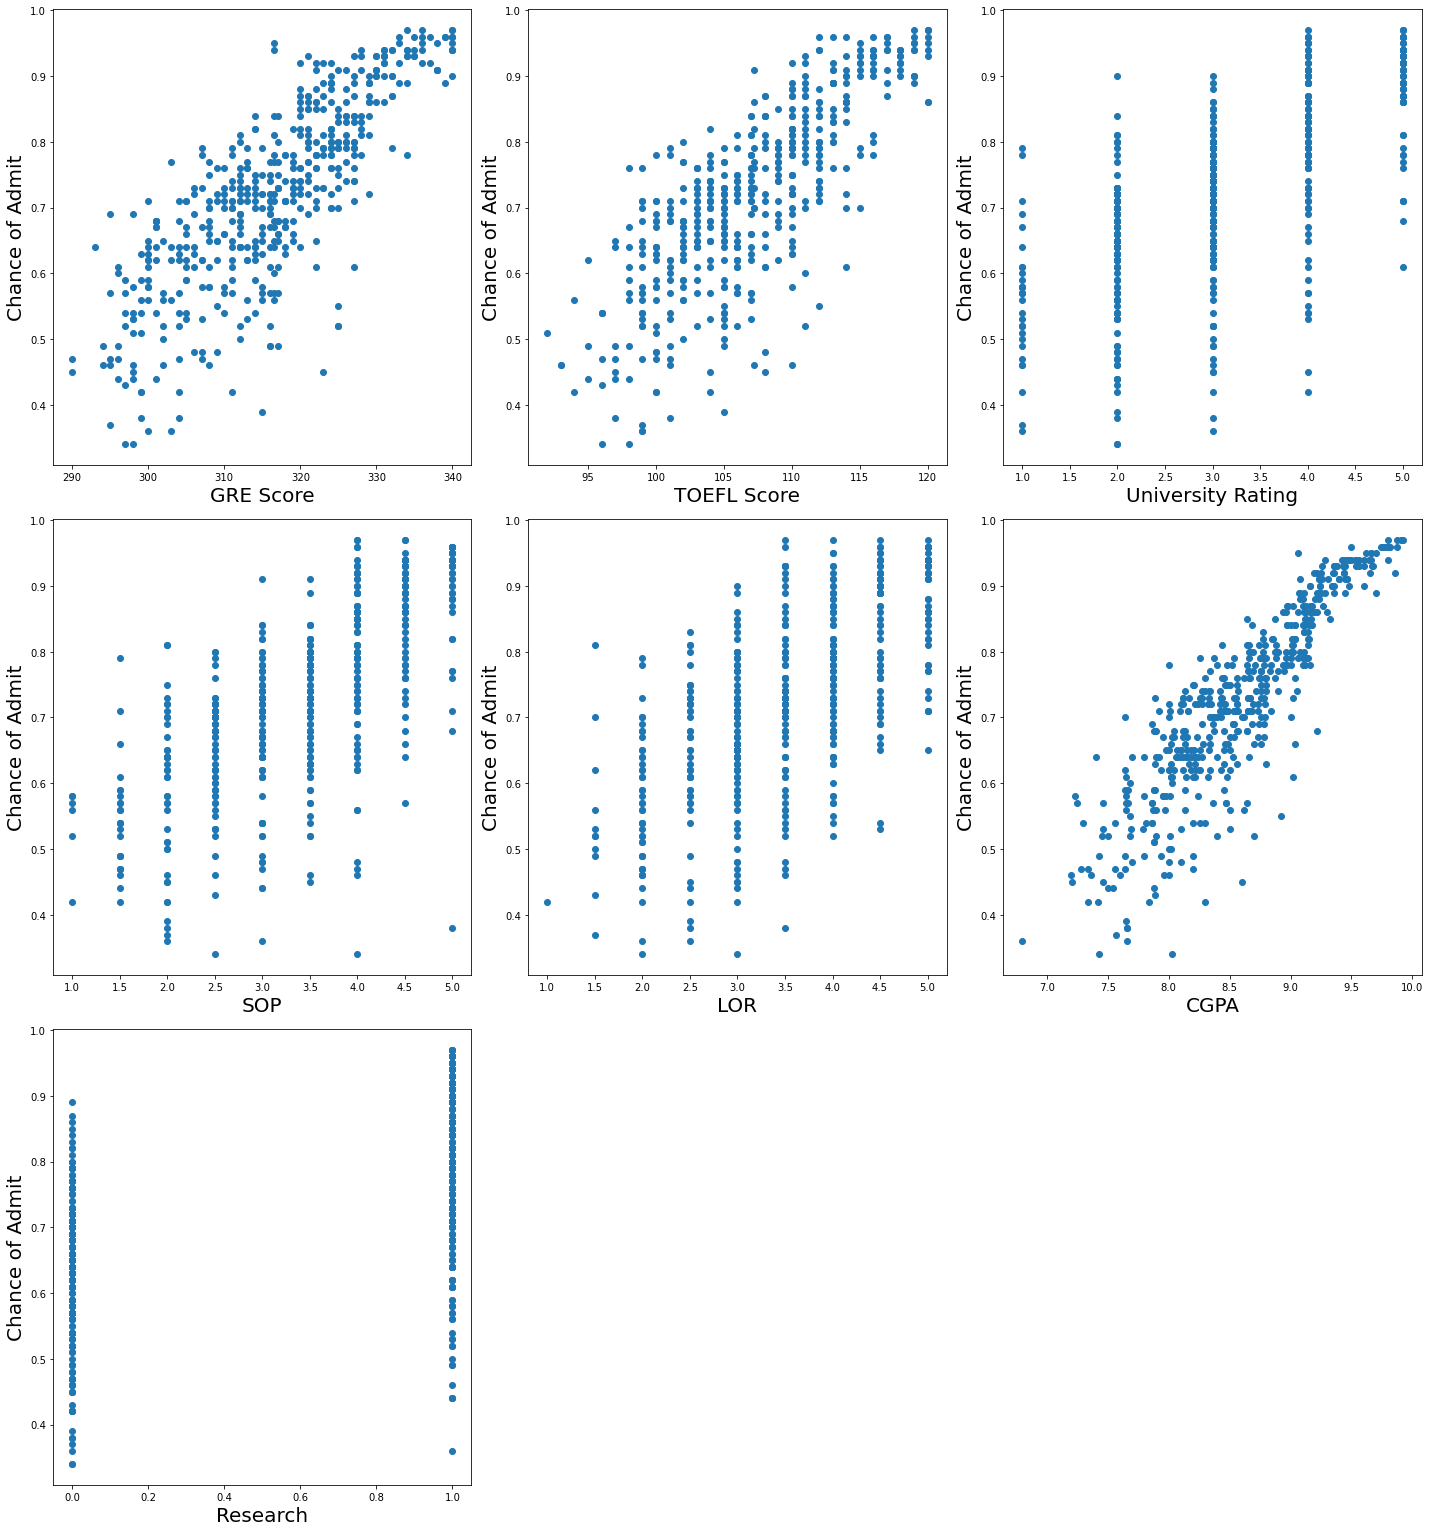

In [12]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [13]:
#Data Scaling. [Z=(x-mean)/std]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)   #(x-mean)/standard deveation

In [14]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=2435324)
y_train.head()

459    0.89
351    0.73
155    0.77
199    0.72
67     0.57
Name: Chance of Admit, dtype: float64

In [16]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [18]:
print('Chance of admission is :',regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of admission is : [0.82475245]


In [19]:
#saving the model
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

#prediction using the saved model
loded_model=pickle.load(open(filename,'rb'))

a=loded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a

array([0.63319662])

In [20]:
#adjust R2 score
regression.score(x_train,y_train)

0.8230170993202376

In [21]:
regression.score(x_test,y_test)

0.8060095675066616

In [22]:
y_pred=regression.predict(x_test)
y_pred

array([0.61039345, 0.66191235, 0.5829775 , 0.75790604, 0.75530711,
       0.64844024, 0.82175417, 0.65140302, 0.58166308, 0.97230221,
       0.65581922, 0.56879977, 0.81541753, 0.68216315, 0.78943504,
       0.55999435, 0.88631335, 0.65838728, 0.52279325, 0.65607634,
       0.78230452, 0.60740443, 0.75646704, 0.61881419, 0.64999137,
       0.64700705, 0.79035625, 0.5846429 , 0.72192339, 0.85553824,
       0.72829115, 0.47962868, 0.77630452, 0.69892618, 0.87448777,
       0.69394296, 0.9920204 , 0.50448417, 0.63895975, 0.69178619,
       0.73322486, 0.59490249, 0.79270037, 0.73343351, 0.69896108,
       0.77814289, 0.64525622, 0.8244846 , 0.80918931, 0.5922299 ,
       0.61053831, 0.71839012, 0.53349086, 0.68726651, 0.94225223,
       0.96482887, 0.74088751, 0.4412815 , 0.60255265, 0.70777038,
       0.74902693, 0.80343845, 0.57459724, 0.55933022, 0.92606094,
       0.72619415, 0.66204453, 0.42543628, 0.84473182, 0.71186059,
       0.70238451, 0.95772817, 0.74660527, 0.91995256, 0.45636

<function matplotlib.pyplot.show(close=None, block=None)>

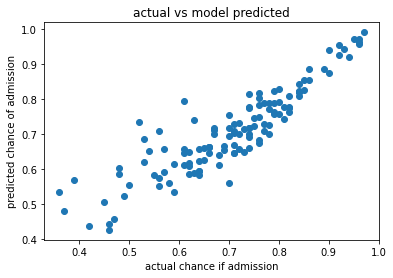

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance if admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show

# Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
y_pred=regression.predict(x_test)

In [26]:
mean_absolute_error(y_test,y_pred)

0.04233847934346593

In [27]:
mean_squared_error(y_test,y_pred)

0.0035105079771827756

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05924953989005126